<a href="https://colab.research.google.com/github/shailendrarg/API-data/blob/master/fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [0]:
#from keras.datasets import fashion_mnist
#fmnist=tf.keras.datasets.fashion_mnist 

In [0]:
#fmnist

In [0]:
#(x_train,y_train),(x_test,y_test)=fmnist.load_data()

In [0]:
#x_train.shape,y_train.shape

In [0]:
#X_train[0]

In [0]:
##plt.show()

In [0]:
#plt.imshow(x_train[0],cmap=plt.cm.binary)
#plt.show()

In [0]:
#y_train[0]

In [0]:
#comapring the same with kaggle data and see if we can plot the same to visualise
import os
#os.chdir("C:\\Users\\vidya\\Anaconda3")

In [0]:
train_df=pd.read_csv("fashion-mnist_train.csv")
test_df=pd.read_csv("fashion-mnist_test.csv")

In [61]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train=train_df.drop(columns=["label"])

In [63]:
X_train.shape

(57213, 784)

In [0]:
X_train=np.array(X_train)

In [0]:
X_train=X_train.reshape(-1,28,28)

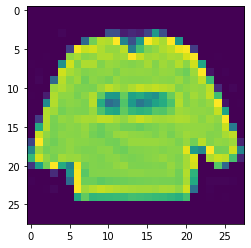

In [66]:
plt.imshow(X_train[0])
plt.show()

In [0]:
Y_train=train_df["label"]

In [68]:
Y_train[0]

2

In [0]:
#create a fucntion to process the kaggle images datasets
def data_preprocess(df):
    X=df.drop(columns=["label"])
    y=df["label"]
    X=np.array(X)
    X=X.reshape(-1,28,28)
    X=X/255.0
    return X,y

In [0]:
X_train,y_train=data_preprocess(train_df)
X_test,y_test=data_preprocess(test_df)

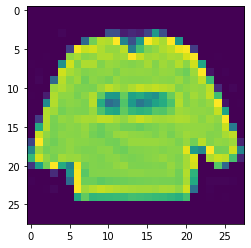

In [71]:
plt.imshow(X_train[0])
plt.show()

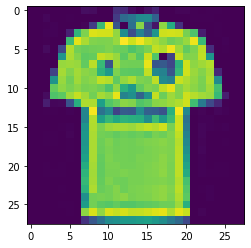

In [72]:
plt.imshow(X_test[0])
plt.show()

In [73]:
y_test[0]

0

In [0]:
#tensor flow takes images like image dmesnions and a channel,so our 28*28 image will be a 28*28*1 or 28*28*3 based on b/wor color image

In [0]:
X_train=X_train.reshape(-1,28,28,1)

In [0]:
X_test=X_test.reshape(-1,28,28,1)

In [77]:
X_train.shape

(57213, 28, 28, 1)

In [78]:
X_train.shape[1:]

(28, 28, 1)

In [0]:
#since we have multople classes we have to encode them as well
y_train=keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

In [0]:
y_test=keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from keras.activations import relu
from keras.layers import Dropout
from keras.callbacks import History

In [0]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=(X_train.shape[1:])))
model.add(MaxPooling2D())
#model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D())
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10,activation="softmax"))

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [85]:
history=model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Train on 45770 samples, validate on 11443 samples
Epoch 1/30
45770/45770 [==============================] - 11s 233us/step - loss: 0.4353 - acc: 0.8424 - val_loss: 0.3375 - val_acc: 0.8795
Epoch 2/30
45770/45770 [==============================] - 10s 225us/step - loss: 0.3030 - acc: 0.8899 - val_loss: 0.3010 - val_acc: 0.8911
Epoch 3/30
45770/45770 [==============================] - 10s 225us/step - loss: 0.2595 - acc: 0.9044 - val_loss: 0.2645 - val_acc: 0.9079
Epoch 4/30
45770/45770 [==============================] - 10s 221us/step - loss: 0.2285 - acc: 0.9158 - val_loss: 0.2936 - val_acc: 0.8929
Epoch 5/30
45770/45770 [==============================] - 10s 223us/step - loss: 0.2022 - acc: 0.9254 - val_loss: 0.2704 - val_acc: 0.9075
Epoch 6/30
45770/45770 [==============================] - 10s 221us/step - loss: 0.1834 - acc: 0.9329 - val_loss: 0.2568 - val_acc: 0.9105
Epoch 7/30
45770/45770 [==============================] - 10s 220us/step - loss: 0.1638 - acc: 0.9388 - val_loss: 0.

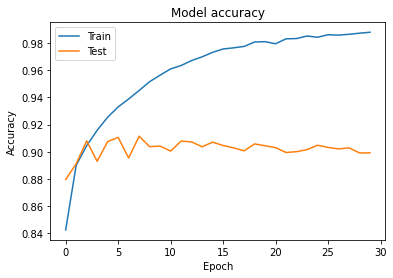

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
X_test=X_test.reshape(-1,28,28,1)

In [88]:
evaluation=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 70us/step


In [89]:
evaluation

[0.6236611412115395, 0.8979]

In [90]:
loss=evaluation[0]
accuracy=evaluation[1]
print("the loss is {} and accuracy is {}".format(loss,accuracy))

the loss is 0.6236611412115395 and accuracy is 0.8979


In [0]:
model.save("fashion_mnist_cnn170320")

In [0]:
prediction=model.predict(X_test)

In [93]:
print(np.argmax(prediction[0]))

0
